In [706]:
# Importing the necessary Libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [707]:
# Sending a request to the website
respond = requests.get('https://en.wikipedia.org/wiki/List_of_countries_by_exports')
respond

<Response [200]>

In [708]:
# Parsing the HTML content
soup = BeautifulSoup(respond.text,'html.parser')
soup

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of countries by exports - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-client

In [709]:
# Creating a variable 'table' to find 'tbody' mentioned within the soup dataset
table = soup.find('tbody')
table

<tbody><tr>
<th>Country
</th>
<th>Exports
</th>
<th>Year
</th>
<th>Top export (2021)<sup class="reference" id="cite_ref-2"><a href="#cite_note-2"><span class="cite-bracket">[</span>2<span class="cite-bracket">]</span></a></sup>
</th></tr>
<tr>
<td><span class="flagicon" style="display:inline-block;width:25px;"><span class="mw-image-border" typeof="mw:File"><span><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_People%27s_Republic_of_China.svg/23px-Flag_of_the_People%27s_Republic_of_China.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_People%27s_Republic_of_China.svg/35px-Flag_of_the_People%27s_Republic_of_China.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_People%27s_Republic_of_China.svg/45px-Flag_of_the_People%27s_Republic_of_China.svg.png 2x" width="23"/></span></span></span> <a href="/wiki

In [710]:
# Creating a variable 'row' to search for the first row in the table
row = table.find('tr')
row

<tr>
<th>Country
</th>
<th>Exports
</th>
<th>Year
</th>
<th>Top export (2021)<sup class="reference" id="cite_ref-2"><a href="#cite_note-2"><span class="cite-bracket">[</span>2<span class="cite-bracket">]</span></a></sup>
</th></tr>

In [711]:
# Searching for all rows in the table
rows = table.find_all('tr')
rows

[<tr>
 <th>Country
 </th>
 <th>Exports
 </th>
 <th>Year
 </th>
 <th>Top export (2021)<sup class="reference" id="cite_ref-2"><a href="#cite_note-2"><span class="cite-bracket">[</span>2<span class="cite-bracket">]</span></a></sup>
 </th></tr>,
 <tr>
 <td><span class="flagicon" style="display:inline-block;width:25px;"><span class="mw-image-border" typeof="mw:File"><span><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_People%27s_Republic_of_China.svg/23px-Flag_of_the_People%27s_Republic_of_China.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_People%27s_Republic_of_China.svg/35px-Flag_of_the_People%27s_Republic_of_China.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_People%27s_Republic_of_China.svg/45px-Flag_of_the_People%27s_Republic_of_China.svg.png 2x" width="23"/></span></span></span> <a href="

In [712]:
# Importing the dataset into a list by searching for the columns in the dataset
dataset = []
for row in rows[1:]:
    cells = row.find_all(['td'])
    if cells:
        Country_Territory = cells[0].text.strip()
        Exports = cells[1].text.strip()
        Top_Export = cells[3].text.strip()
        dataset.append([Country_Territory,Exports,Top_Export])

In [713]:
# Setting the dataframe based on the columns in the dataset collected from the website table
df = pd.DataFrame(dataset, columns = ['Country_Territory','Exports','Top_Export'])
df

,Country_Territory,Exports,Top_Export
0,China (mainland),"3,511,248",Broadcasting equipment
1,United States,"3,051,824",Petroleum
2,Germany,"2,104,251",Cars
3,United Kingdom,"1,074,781",Gold
4,France,"1,051,679",Packaged medications
...,...,...,...
200,Tonga,60,Shellfish
201,Nauru,31,Fish
202,Palau,12,Computers
203,Kiribati,11,Fish


In [714]:
# Changing the data type from object to numeric
df['Exports'] = df['Exports'].str.replace(',',"", regex=True).apply(pd.to_numeric, errors='coerce')
df

,Country_Territory,Exports,Top_Export
0,China (mainland),3511248,Broadcasting equipment
1,United States,3051824,Petroleum
2,Germany,2104251,Cars
3,United Kingdom,1074781,Gold
4,France,1051679,Packaged medications
...,...,...,...
200,Tonga,60,Shellfish
201,Nauru,31,Fish
202,Palau,12,Computers
203,Kiribati,11,Fish


In [715]:
# Saving the new cleaned dataset as a csv to a location in my drive
df.to_csv("C:\\Users\\Sidne\\OneDrive\\Desktop\\Semester3-V2\\ListOfCountryExports.csv",index=False)

In [716]:
# Typo
df.loc[2, ['Country_Territory', 'Top_Export']] = ['gERmaNY', 'cARs']
df.head()

,Country_Territory,Exports,Top_Export
0,China (mainland),3511248,Broadcasting equipment
1,United States,3051824,Petroleum
2,gERmaNY,2104251,cARs
3,United Kingdom,1074781,Gold
4,France,1051679,Packaged medications


In [717]:
# Typo Fix
df.loc[2, ['Country_Territory', 'Top_Export']] = ['Germany', 'Cars']
df.head()

,Country_Territory,Exports,Top_Export
0,China (mainland),3511248,Broadcasting equipment
1,United States,3051824,Petroleum
2,Germany,2104251,Cars
3,United Kingdom,1074781,Gold
4,France,1051679,Packaged medications


In [718]:
# Column Duplicate
df['Top_Exports'] = df['Top_Export']
df.head()

,Country_Territory,Exports,Top_Export,Top_Exports
0,China (mainland),3511248,Broadcasting equipment,Broadcasting equipment
1,United States,3051824,Petroleum,Petroleum
2,Germany,2104251,Cars,Cars
3,United Kingdom,1074781,Gold,Gold
4,France,1051679,Packaged medications,Packaged medications


In [719]:
# Column Duplicate Fix
df = df.drop('Top_Exports', axis=1)
df.head()

,Country_Territory,Exports,Top_Export
0,China (mainland),3511248,Broadcasting equipment
1,United States,3051824,Petroleum
2,Germany,2104251,Cars
3,United Kingdom,1074781,Gold
4,France,1051679,Packaged medications


In [720]:
# Row Duplicate 
Row_Duplicate = df.iloc[[3]]
df.head()

,Country_Territory,Exports,Top_Export
0,China (mainland),3511248,Broadcasting equipment
1,United States,3051824,Petroleum
2,Germany,2104251,Cars
3,United Kingdom,1074781,Gold
4,France,1051679,Packaged medications


In [721]:
# Concatenate the selected row with the original dataframe 
df = pd.concat([Row_Duplicate, df]) 
df.head()

,Country_Territory,Exports,Top_Export
3,United Kingdom,1074781,Gold
0,China (mainland),3511248,Broadcasting equipment
1,United States,3051824,Petroleum
2,Germany,2104251,Cars
3,United Kingdom,1074781,Gold


In [722]:
# Sort the dataframe to place the duplicated row at the beginning 
df = df.sort_index().reset_index(drop=True)
df.head()

,Country_Territory,Exports,Top_Export
0,China (mainland),3511248,Broadcasting equipment
1,United States,3051824,Petroleum
2,Germany,2104251,Cars
3,United Kingdom,1074781,Gold
4,United Kingdom,1074781,Gold


In [723]:
# Row Duplicate Fix
df = df.drop_duplicates()
df.head()

,Country_Territory,Exports,Top_Export
0,China (mainland),3511248,Broadcasting equipment
1,United States,3051824,Petroleum
2,Germany,2104251,Cars
3,United Kingdom,1074781,Gold
5,France,1051679,Packaged medications


In [724]:
# Data Type Error
df['Exports'] = df['Exports'].astype(str)

In [725]:
# Checking Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 0 to 205
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Country_Territory  205 non-null    object
 1   Exports            205 non-null    object
 2   Top_Export         205 non-null    object
dtypes: object(3)
memory usage: 6.4+ KB


In [726]:
# Data Type Fix
df['Exports'] = pd.to_numeric(df['Exports'], errors='coerce')

In [727]:
# Checking Data Type Changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 0 to 205
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Country_Territory  205 non-null    object
 1   Exports            205 non-null    int64 
 2   Top_Export         205 non-null    object
dtypes: int64(1), object(2)
memory usage: 6.4+ KB


In [728]:
# Displaying the first few rows
df.head()

,Country_Territory,Exports,Top_Export
0,China (mainland),3511248,Broadcasting equipment
1,United States,3051824,Petroleum
2,Germany,2104251,Cars
3,United Kingdom,1074781,Gold
5,France,1051679,Packaged medications


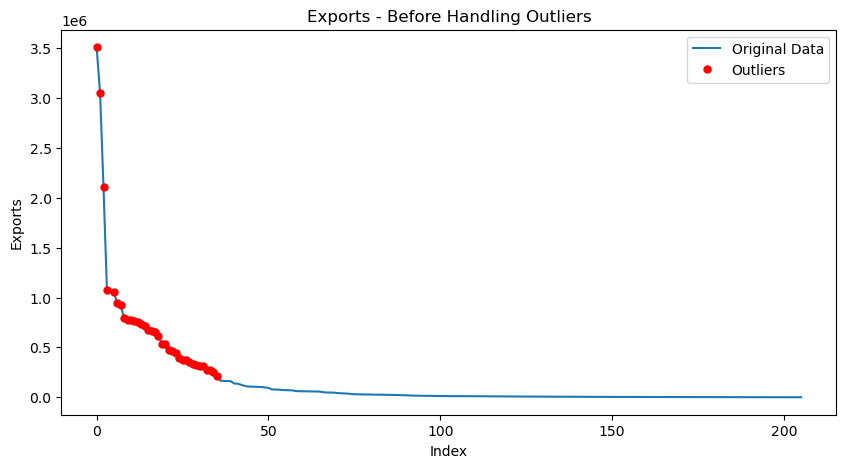

In [729]:
# Importing Library necessary for peforming the plotting of graphs
import matplotlib.pyplot as plt
# Calculating the IQR for Outlier Detection
Q1 = df['Exports'].quantile(0.25)
Q3 = df['Exports'].quantile(0.75)
IQR = Q3 - Q1
# Defining bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# For filtering any anomalies
df['Anomaly_IQR'] = (df['Exports'] < lower_bound) | (df['Exports'] > upper_bound )

# Ploting the data before handling the outliers
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Exports'], label='Original Data')
plt.plot(df[df['Anomaly_IQR']].index, df[df['Anomaly_IQR']]['Exports'], 'ro', markersize=5, label='Outliers')

# Setting the labels, title, and legend
plt.xlabel('Index')  
plt.ylabel('Exports') 
plt.title('Exports - Before Handling Outliers')  
plt.legend()
plt.show()

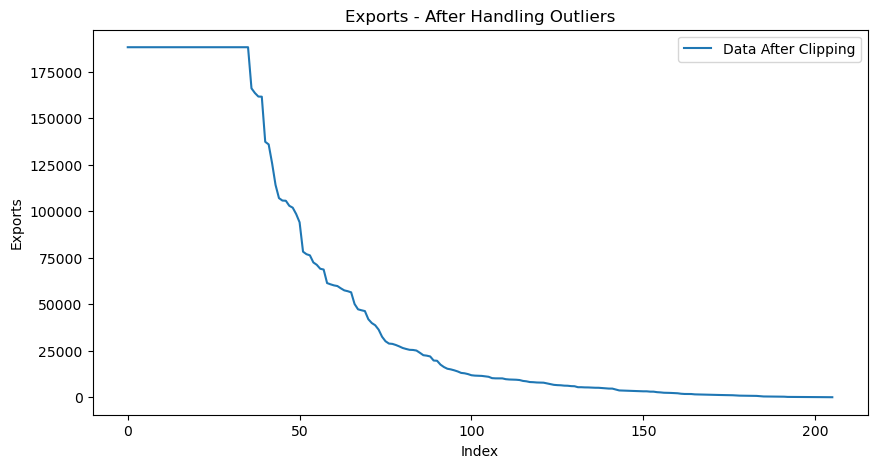

In [730]:
# Handling the outliers by clipping
df['Exports'] = df['Exports'].clip(lower=lower_bound, upper=upper_bound)

# Plotting the data after handling the outliers to view the change
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Exports'], label='Data After Clipping')

# Setting the labels, title, and legend
plt.xlabel('Index') 
plt.ylabel('Exports')
plt.title('Exports - After Handling Outliers')
plt.legend()
plt.show()